# Project stage 1.5

# Literature review

#### First paper

Haider, N.S., Singh, B.K., Periyasamy, R. et al. Respiratory Sound Based Classification of Chronic Obstructive Pulmonary Disease: a Risk Stratification Approach in Machine Learning Paradigm. J Med Syst 43, 255 (2019). https://doi.org/10.1007/s10916-019-1388-0.

The research paper uses 55 recordings consisting of 30 COPD and 25 healthy subject data. The paper tells that detecting COPD is a challenging task and the prediction is affected by variety of factors like spirometry is affected by patient's age or some weaknesses. The study extracts 39 features from lung sound and 3 spirometry based features. Firstly, it states that the noise can degrade the quality of the sound, so applies Savitzky-Golay filter to the breath sound to remove noise. After that 13 Mel-frequency cepstral coefficients are extracted, linear predictive coefficients (LPC1 and LPC2) and other 24 features (like spectral centroid, min, max, peak value, dominant frequency, std, etc.). It then uses statistical approaches to determine the most significant features to diagnose COPD. It uses t-test and Mann-Whitney U test. Finally, machine learning classification algorithms are applied for training and doing predictions (SVM, Logistic Regression, etc.). The best modles got on average more than 96% sensitivity on the test dataset.

#### Second paper

Rocha, B.M. et al. (2018). Α Respiratory Sound Database for the Development of Automated Classification. In: Maglaveras, N., Chouvarda, I., de Carvalho, P. (eds) Precision Medicine Powered by pHealth and Connected Health. ICBHI 2017. IFMBE Proceedings, vol 66. Springer, Singapore. https://doi.org/10.1007/978-981-10-7419-6_6.

The paper talks overall about the respiratory sounds and the development of automated classification. It provides wider idea about crackles and wheezes. Specifically, crackles are discontinuous, explosive, and non-musical sounds that occur frequently in cardiorespiratory diseases (diseases affecting the heart and the respiratory system lungs and airways). Based on the duration, loudness and the pitch of the crackle doctors diagnose and understand lung conditions. Wheezes are musical respiratory sounds usually lasting more than 250 ms. They commonly appear in patients with obstructive airway diseases such as asthma or COPD. So the characteristics of lung sound are affected by the respiratory diseases.

#### Third paper

Cátia Pinho, Ana Oliveira, Cristina Jácome, João Rodrigues, Alda Marques,
Automatic Crackle Detection Algorithm Based on Fractal Dimension and Box Filtering, Procedia Computer Science, Volume 64, 2015, Pages 705-712, ISSN 1877-0509, https://doi.org/10.1016/j.procs.2015.08.592.

The third paper concentrates on detecting crackles and provides some ways to analyze them. The algorithm is based on the following three steps:
1) Extraction of a window of interest of a potential crackle (based on fractal dimension and box filtering techniques),  
2) Veritification of the validity of the potential crackle based on some respiratory sound analysis established criteria,  
3) Charcaterisation and extraction of crackle parameters.

The data consists of 24 10-second files were selected from 10 patients with pneumonia and cystic fibrosis. The performance metric used for evaluating the model was obtained by the agreement among three experts. The method got F index=92%.

The key interesting factor in this paper is the extraction of potential crackles from the recording.

# Data description

Respiratory sounds are important indicators of respiratory health and respiratory disorders. The sound emitted when a person breathes is directly related to air movement, changes within lung tissue and the position of secretions within the lung.

The dataset contains 920 annotated respiratory varying length recordings taken from digital stethoscopes and other recording techniques. It includes both clean sounds as well as noisy recordings that simulate real life conditions. The patients are of all age groups - children, adults and the elderly.

Some important notes and background information about the dataset:

Audio file format is the following:

PatientN_RecIndex_ChestLoc_AcquisitionMode_RecEquipment.wav

- Patient number: (101,102,...,226) indicates the unique id of the patient, as well as, is an indicator for the disease the patient is having (taken from the patient_diagnosis.csv file)
- Recording index
- Chest location: Trachea (Tc), Anterior left (Al), Anterior right (Ar), Posterior left (Pl), Posterior right (Pr), Lateral left (Ll), Lateral right (Lr). Probably shows the area of the chest where the recordings are taken.
- Acquisition mode: single channel (sc) or multichannel (mc). Indicates whether the recording is single channel or multichannel.
- Recording equipment: AKG C417L Microphone (AKGC417L), 3M Littmann Classic II SE Stethoscope (LittC2SE), 3M Litmmann 3200 Electronic Stethoscope (Litt3200), WelchAllyn Meditron Master Elite Electronic Stethoscope (Meditron). Indicates the equipment from which the recording was made.

There are also annotation text files of format:

PatientN_RecIndex_ChestLoc_AcquisitionMode_RecEquipment.txt 

There are four columns in the annotation file:

- Beginning of respiratory cycle(s)
- End of respiratory cycle(s)
- Presence/absence of crackles (presence=1, absence=0)
- Presence/absence of wheezes (presence=1, absence=0)

The respiratory cycle, also known as the breathing cycle or respiratory rhythm, refers to the complete sequence of events involved in breathing. It encompasses the process of inhaling (inspiration) and exhaling (expiration) air in and out of the lungs. (ChatGPT)

So, as a conclusion, there are lots of annotations available that can be used to explore the respiratory sounds deeper.

# Importing the libraries

Librosa is a popular package for audio analysis and processing. It contains bunch of useful functions that can be used to work with audio.

In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob

# Counting the lengths of the recordings

Most recordings had similar sizes or even identical sizes, we want to check what percent of the recordings have same length.

In [2]:
# Defining the original data folder path
recording_folder_path = './Respiratory_Sound_Database/audio_and_txt_files/'

In [3]:
# Getting all recordings' paths from the data folder
recording_paths = glob(recording_folder_path + '*.wav')

In [4]:
# Getting the lengths of the recordings

# List to keep the lengths
length_list = []

# List to keep the sampling rates
sr_list = []

# For path in the paths list
for path in recording_paths:
    
    # Load the wav file using librosa with original sampling rate and original number of channels
    audio, sr = librosa.load(path, sr=None, mono=False)
    
    if len(audio.shape) == 2:
        print(f'{path} is a multichannel recording')
    
    # Append the length of the audio to the list
    length_list.append(len(audio)/sr)
    
    # Append the sr of the audio to the list
    sr_list.append(sr)

While stated in the source of the data that some recordings are multichannel, wav files are all mono, in other words, have just one channel.

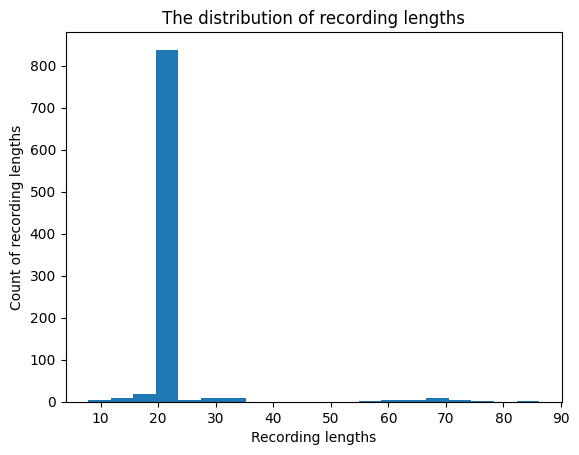

In [5]:
# Plot the distribution of recording lengths

plt.ylabel('Count of recording lengths')
plt.xlabel('Recording lengths')
plt.title('The distribution of recording lengths')
plt.hist(length_list, bins=20)
plt.show()

The distribution plot of the recording lengths shows that most of the recordings are 20-second-length. 

In [6]:
from collections import Counter

In [7]:
# Count the number of each length occurences
length_counts = dict(Counter(length_list))

In [8]:
# Length counts dictionary
length_counts

{20.0: 801,
 15.856: 1,
 25.584: 1,
 18.48: 1,
 15.024: 1,
 22.96: 1,
 23.728: 1,
 20.336: 2,
 19.952: 1,
 16.944: 2,
 17.456: 1,
 17.648: 1,
 30.0: 6,
 71.45: 1,
 32.3: 1,
 32.4: 2,
 75.25: 1,
 20.00002267573696: 16,
 67.85: 1,
 33.6: 1,
 29.36: 1,
 14.576: 4,
 15.728: 1,
 20.848: 2,
 19.632: 3,
 21.936: 1,
 15.472: 1,
 18.352: 1,
 12.528: 2,
 20.08: 1,
 12.464: 2,
 66.75: 2,
 86.2: 1,
 67.4: 2,
 11.248: 1,
 18.224: 2,
 17.264: 2,
 9.584: 1,
 7.856: 1,
 19.97: 1,
 16.24: 1,
 19.98: 1,
 65.05: 2,
 66.5: 1,
 63.1: 2,
 19.83: 1,
 62.05: 2,
 57.8: 1,
 62.5: 2,
 18.864: 1,
 16.368: 1,
 21.68: 1,
 16.752: 1,
 18.672: 1,
 23.024: 1,
 19.376: 1,
 18.736: 1,
 24.24: 1,
 26.928: 1,
 24.624: 1,
 21.872: 1,
 19.8: 1,
 19.95: 1,
 19.82: 1,
 19.84: 1,
 71.05: 2,
 82.5: 1,
 68.95: 2,
 28.464: 1,
 28.08: 1,
 74.45: 1,
 69.45: 1,
 73.35: 1,
 33.9: 2,
 33.2: 2,
 32.9: 2}

More than 80% of the recordings have length of 20 seconds, there are also some recordings that have length very close to 20 seconds. As the recordings contain respiratory cycles (each recording may contain 1 or more cycles) we can work with varying length recordings, since the cycles are the point of interest and they should be extracted from the recordings.

# Understanding the sampling rate of the recordings

Most of recordings have a sampling rate of 44100, we can check if all 20-second recordings have the same sampling rate.

In [9]:
from collections import defaultdict

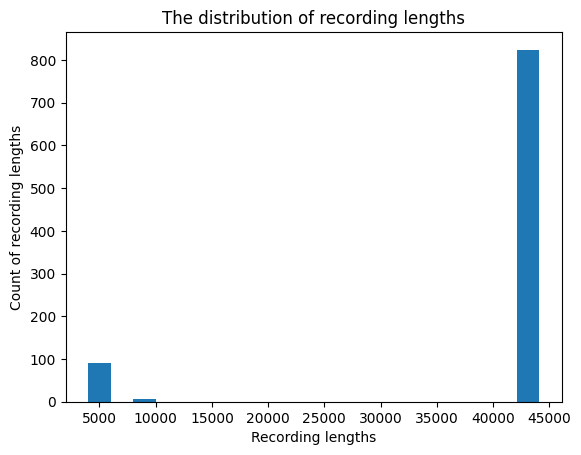

In [10]:
# Plot the distribution of recording lengths

plt.ylabel('Count of recording lengths')
plt.xlabel('Recording lengths')
plt.title('The distribution of recording lengths')
plt.hist(sr_list, bins=20)
plt.show()

In [11]:
# Count the sampling rates
sr_counts = dict(Counter(sr_list))

In [12]:
# Dictionary count results
sr_counts

{44100: 824, 4000: 90, 10000: 6}

Most of the recordings (824) have 44100 sampling rate, 96 recordings have other sampling rate. For further analysis, we should make them have the same sampling rate, if there is no other problem-specific reason for them being different.

# Counting the labels

We count the labels to understand the imbalance in the data. There are in total 8 labels to classify the recordings to.

In [20]:
# The path to the directory of the labels
label_path = './Respiratory_Sound_Database/'

In [21]:
# Reading the label data
label_csv = pd.read_csv(label_path + 'patient_diagnosis.csv')

In [22]:
# Printing the data
label_csv

,ID,Disease
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
...,...,...
121,222,COPD
122,223,COPD
123,224,Healthy
124,225,Healthy


In [23]:
# Creating a label dictionary with mapping 'PatientID': 'Disease'
label_dict = dict(zip(label_csv['ID'], label_csv['Disease']))

In [24]:
# Printing the results
label_dict

{101: 'URTI',
 102: 'Healthy',
 103: 'Asthma',
 104: 'COPD',
 105: 'URTI',
 106: 'COPD',
 107: 'COPD',
 108: 'LRTI',
 109: 'COPD',
 110: 'COPD',
 111: 'Bronchiectasis',
 112: 'COPD',
 113: 'COPD',
 114: 'COPD',
 115: 'LRTI',
 116: 'Bronchiectasis',
 117: 'COPD',
 118: 'COPD',
 119: 'URTI',
 120: 'COPD',
 121: 'Healthy',
 122: 'Pneumonia',
 123: 'Healthy',
 124: 'COPD',
 125: 'Healthy',
 126: 'Healthy',
 127: 'Healthy',
 128: 'COPD',
 129: 'URTI',
 130: 'COPD',
 131: 'URTI',
 132: 'COPD',
 133: 'COPD',
 134: 'COPD',
 135: 'Pneumonia',
 136: 'Healthy',
 137: 'URTI',
 138: 'COPD',
 139: 'COPD',
 140: 'Pneumonia',
 141: 'COPD',
 142: 'COPD',
 143: 'Healthy',
 144: 'Healthy',
 145: 'COPD',
 146: 'COPD',
 147: 'COPD',
 148: 'URTI',
 149: 'Bronchiolitis',
 150: 'URTI',
 151: 'COPD',
 152: 'Healthy',
 153: 'Healthy',
 154: 'COPD',
 155: 'COPD',
 156: 'COPD',
 157: 'COPD',
 158: 'COPD',
 159: 'Healthy',
 160: 'COPD',
 161: 'Bronchiolitis',
 162: 'COPD',
 163: 'COPD',
 164: 'URTI',
 165: 'URTI',

In [25]:
# Label counter default dict
label_counter = defaultdict(int)

# For each recording
for path in recording_paths:
    
    # Find the ID of the recording from the name
    rec_id = int(path.split('\\')[-1][:3])
    
    # Find the mapping of the label from ID
    label = label_dict[rec_id]
    
    # Add 1 to the value of that certain label we found
    label_counter[label] += 1

In [19]:
# Printing dictionary label counter
dict(label_counter)

{'URTI': 23,
 'Healthy': 35,
 'Asthma': 1,
 'COPD': 793,
 'LRTI': 2,
 'Bronchiectasis': 16,
 'Pneumonia': 37,
 'Bronchiolitis': 13}

Very imbalanced data, there is just one recording for class 'Asthma' and two recordings for 'LRTI' class. It is very unlikely that we can train something from such few data, so we may need to remove them later.

# Understanding the patient demographics

In [29]:
# The main path to the demographics file
demographics_path = './Respiratory_Sound_Database/'

In [30]:
# Read the demographics as pandas dataframe
demographics_df = pd.read_csv(demographics_path + 'demographic_info.txt', sep=' ', header=None, names=['PatientID', 'Age', 'Gender', 'Adult BMI (kg/m2)', 'Child Weight (kg)', 'Child Height (cm)'])

In [31]:
# Show the dataframe
demographics_df

,PatientID,Age,Gender,Adult BMI (kg/m2),Child Weight (kg),Child Height (cm)
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0
...,...,...,...,...,...,...
121,222,60.00,M,NaN,NaN,NaN
122,223,NaN,NaN,NaN,NaN,NaN
123,224,10.00,F,NaN,32.3,143.0
124,225,0.83,M,NaN,7.8,74.0


In [23]:
# Find the missing values of the dataframe
demographics_df.isnull().sum()

PatientID             0
Age                   1
Gender                1
Adult BMI (kg/m2)    51
Child Weight (kg)    82
Child Height (cm)    84
dtype: int64

In [24]:
# The row with the missing values corresponds to which label
label_dict[223]

'COPD'

There is just one person that we don't know anything about him and that person belongs to class 'COPD' from which we have bunch of data. So, we may need to remove that person's data if we decide to use demographics.

Demographics data is an important indicator for predictions, because whether the patient is an adult or a child can have a big impact. Some work should be done on the dataframe, we can calculate Child BMI, merge it with Adult BMI and add a binary column indicating whether the patient is an adult or not.

# Understanding a recording

In [32]:
# Taking an example recording
ex_rec_path = recording_paths[25]
ex_rec_path

'./Respiratory_Sound_Database/audio_and_txt_files\\107_2b4_Pr_mc_AKGC417L.wav'

In [33]:
# Loading the wav file
audio, sr = librosa.load(ex_rec_path, sr=None, mono=False)

In [34]:
# Load the annotations txt file and create a pandas dataframe from it
txt_file = ex_rec_path[:-3] + 'txt'
txt_df = pd.read_csv(txt_file, sep='\t', header=None, names=['cycle_start', 'cycle_end', 'crackle', 'wheeze'])

In [35]:
# Looking to the annotations file
txt_df

,cycle_start,cycle_end,crackle,wheeze
0,1.018,3.411,1,0
1,3.411,5.827,1,0
2,5.827,8.339,1,0
3,8.339,10.923,1,0
4,10.923,13.292,1,0
5,13.292,16.018,1,0
6,16.018,18.482,1,0
7,18.482,19.542,1,0


In [36]:
# Function for cutting a breathing cycle from the recording having the annotations data

def cut_cycle(audio, sr, cycle_start, cycle_end):
    """
    Cuts a breathing cycle from recording.
    
    Parameters:
    - audio: the recording from which to extract the cycle
    - sr: the sampling rate 
    - cycle_start: (in seconds) the start of the cycle
    - cycle_end: (in seconds) the end of the cycle
    
    Returns:
    The breathing cycle extracted from the recording.
    
    Note: 
    In the case of floating numbers, the start index is rounded to down, 
    the end index is rounded to up.

    """
    cycle = audio[int(cycle_start * sr): int(np.ceil(cycle_end*sr))]
    
    return cycle

In [38]:
# The index of the cycle to take from the annotations
index = 2

In [39]:
# Cut a cycle from the audio based on the cycle index given 
cycle = cut_cycle(audio, sr, txt_df.loc[index, 'cycle_start'], txt_df.loc[index, 'cycle_end'])
print(f"Cycle {index} contains crackles = {txt_df.loc[index, 'crackle']} and wheezes = {txt_df.loc[index, 'wheeze']}")

Cycle 2 contains crackles = 1 and wheezes = 0


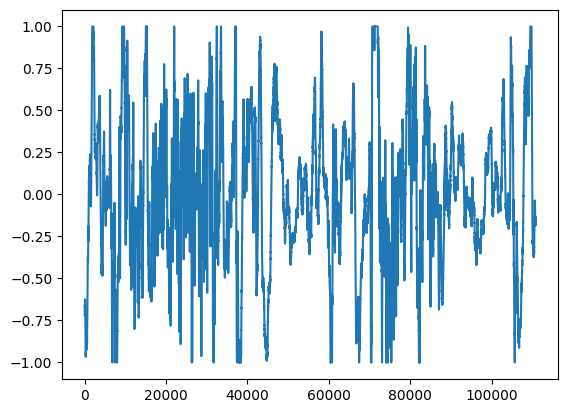

In [40]:
# Plot the cycle
plt.plot(cycle)
plt.show()

In [41]:
from IPython.display import Audio

In [42]:
# Play the cycle in jupyter notebook
listen_audio = Audio(data=cycle, rate=sr)
display(listen_audio)

# Conclusions made so far

- Most recordings had 20-second-length and 44100 sampling rate.
- While it was stated that some recordings are multichannel, all wav files were single channel.
- There were some classes that had 1-2 observations each, which may be too little for doing analysis.

# Further work

The dataset has much info about the experiment and gives opportunity to try different analyses on it. After getting more depth insights from the data the following ideas are the further work on the dataset.

- Try to find a reasoning for different sampling rates (for example, it may be different based on the equipment the audio was recorded. If nothing found, adjust the sampling rates of all recordings to 44100.  
  
    
- Understand the difference between the equipments and whether their produced recordings are significantly different from each other (can conduct some statistical tests to verify it).


- Understand the difference of recordings from different chest positions. Can the position of the chest from which the recording was taken play a role for detecting the disease?


- Understand the crackles and wheezes better and how do they affect the recordings (breathing procedure). Do research about ready libraries for detecting crackles or wheezes. If not, can think about the problem of solving the automatic crackle and wheeze detection algorithm.


- Work on the demographics data, handle the missing values problem, concantenate some features where possible to get rid of 'Na' values. Be ready to use its information for classification task as demographic features. 


- Work on the labels data, become sure about if the few observation class data should be removed.
  
  
- Try the idea of the first paper but with several modifications. Specifially, the frequency information of the recordings can be extracted using Short-Time Fourier Transform or Fast Fourier Transform (Based on the domain we want to get). Then the statistical measures can be computed on the extracted frequency information rather than just the audio component. The extracted measures can be potential features for classification. 


- After the basic model is ready, some noise extraction tools can be used to try enhance the quality of recordings and see the performance difference before and after.


- After the basic model is ready, try to handle the imbalance in the dataset by upsampling method. Think about data augmentation techniques.


After further analysis of the data more information can be unhidden. The further work can be understood sequentially from top to bottom, the top point as the first task to do and the bottom-most one as the last thing to do from the list. 